# Drug review Data Set

1. Review: These are snippets of text containing customer feedback or comments.
2. Rating: The numerical rating given by the customer (ranging from 0 to 10).
3. Rating Category: Indicates whether the review is positive or negative.

**Tried to Achive the if the Review is positive, Negtive or neutral.**

In [1]:
# prompt: mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Data_set/drug+review+dataset+drugs+com/drugsComTest_raw.tsv', sep='\t')


In [14]:
df.head(5)

,review,rating,rating_category
0,"""I&#039;ve tried a few antidepressants over th...",10.0,positive
1,"""My son has Crohn&#039;s disease and has done ...",8.0,positive
2,"""Quick reduction of symptoms""",9.0,positive
3,"""Contrave combines drugs that were used for al...",9.0,positive
4,"""I have been on this birth control for one cyc...",9.0,positive


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   53766 non-null  int64  
 1   drugName     53766 non-null  object 
 2   condition    53471 non-null  object 
 3   review       53766 non-null  object 
 4   rating       53766 non-null  float64
 5   date         53766 non-null  object 
 6   usefulCount  53766 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ MB


In [6]:
df.describe()

,Unnamed: 0,rating,usefulCount
count,53766.000000,53766.000000,53766.000000
mean,116386.701187,6.976900,27.989752
std,67017.739881,3.285207,36.172833
min,0.000000,1.000000,0.000000
25%,58272.500000,4.000000,6.000000
50%,116248.500000,8.000000,16.000000
75%,174586.750000,10.000000,36.000000
max,232284.000000,10.000000,949.000000


In [7]:
df.columns

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0', 'drugName', 'condition', 'date',
       'usefulCount'], axis=1, inplace =True)

In [9]:
df.head()

,review,rating
0,"""I&#039;ve tried a few antidepressants over th...",10.0
1,"""My son has Crohn&#039;s disease and has done ...",8.0
2,"""Quick reduction of symptoms""",9.0
3,"""Contrave combines drugs that were used for al...",9.0
4,"""I have been on this birth control for one cyc...",9.0


In [10]:
df['rating_category'] = np.where(df['rating'] >= 7, 'positive', np.where(df['rating'] <= 4, 'negative', 'neutral'))
df.head()

,review,rating,rating_category
0,"""I&#039;ve tried a few antidepressants over th...",10.0,positive
1,"""My son has Crohn&#039;s disease and has done ...",8.0,positive
2,"""Quick reduction of symptoms""",9.0,positive
3,"""Contrave combines drugs that were used for al...",9.0,positive
4,"""I have been on this birth control for one cyc...",9.0,positive


In [ ]:
x = df['review']
y = df['rating_category']

In [ ]:
# Bag-of-Words (BoW) representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(x).toarray()

In [ ]:
X_bow1 = vectorizer.fit_transform(x)

In [ ]:
X_bow.shape

(53766, 33626)

In [ ]:
X_bow1.shape

(53766, 33626)

In [ ]:
# Word Embeddings representation
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
sequences = tokenizer.texts_to_sequences(x)
X_emb = pad_sequences(sequences, padding='post')

In [ ]:
  import nltk
  nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

# Preprocess your text data
# Assuming x is a list of text documents

# Train Word2Vec model
tokenized_text = [word_tokenize(text.lower()) for text in x]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to vector representation using Word2Vec
def text_to_vector(text, model, vector_size):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Initialize an empty array to store vectors
    text_vector = np.zeros((vector_size,))
    count = 0
    for word in tokens:
        try:
            # Get the word vector from the Word2Vec model
            word_vector = model.wv[word]
            # Add the word vector to the text vector
            text_vector += word_vector
            count += 1
        except KeyError:
            # If the word is not in the vocabulary, continue to the next word
            continue
    # Take the average of word vectors to represent the entire text
    if count != 0:
        text_vector /= count
    return text_vector

# Convert each text sample into a fixed-size vector representation
X_word2vec = np.array([text_to_vector(text, word2vec_model, vector_size=100) for text in x])


LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/PY3/english.pickle[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************


In [ ]:
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}
y = np.array([label_map[s] for s in y])

In [ ]:
X = X_emb
y = y  # Sampl

In [ ]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(500, activation='relu'),
    # Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=30, batch_size=80, validation_split=0.1)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/30
484/484 [==============================] - 9s 17ms/step - loss: 9.9721 - accuracy: 0.5276 - val_loss: 3.0076 - val_accuracy: 0.4379
Epoch 2/30
484/484 [==============================] - 8s 17ms/step - loss: 1.4916 - accuracy: 0.5931 - val_loss: 1.5815 - val_accuracy: 0.6081
Epoch 3/30
484/484 [==============================] - 8s 17ms/step - loss: 0.9793 - accuracy: 0.6497 - val_loss: 1.1787 - val_accuracy: 0.6102
Epoch 4/30
484/484 [==============================] - 8s 16ms/step - loss: 0.8253 - accuracy: 0.6778 - val_loss: 1.1951 - val_accuracy: 0.5753
Epoch 5/30
484/484 [==============================] - 8s 17ms/step - loss: 0.7236 - accuracy: 0.7044 - val_loss: 1.2798 - val_accuracy: 0.6490
Epoch 6/30
484/484 [==============================] - 8s 18ms/step - loss: 0.7022 - accuracy: 0.7144 - val_loss: 1.1809 - val_accuracy: 0.5986
Epoch 7/30
484/484 [==============================] - 9s 18ms/step - loss: 0.6695 - accuracy: 0.7253 - val_loss: 1.2234 - val_accuracy: 0.6437

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the neural network architecture
model = Sequential([
    Dense(1000, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(500, activation='relu'),
    # Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(50, activation='relu'),
    Dense(20, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with softmax activation for multi-class classification
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=10, validation_split=0.1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/30
3871/3871 [==============================] - 38s 10ms/step - loss: 2.8688 - accuracy: 0.6514 - val_loss: 0.8454 - val_accuracy: 0.6553
Epoch 2/30
3871/3871 [==============================] - 36s 9ms/step - loss: 0.8546 - accuracy: 0.6596 - val_loss: 0.8457 - val_accuracy: 0.6553
Epoch 3/30
3871/3871 [==============================] - 37s 10ms/step - loss: 0.8364 - accuracy: 0.6599 - val_loss: 0.8456 - val_accuracy: 0.6553
Epoch 4/30
3871/3871 [==============================] - 36s 9ms/step - loss: 0.8364 - accuracy: 0.6599 - val_loss: 0.8455 - val_accuracy: 0.6553
Epoch 5/30
3871/3871 [==============================] - 36s 9ms/step - loss: 0.8364 - accuracy: 0.6599 - val_loss: 0.8455 - val_accuracy: 0.6553
Epoch 6/30
3871/3871 [==============================] - 36s 9ms/step - loss: 0.8364 - accuracy: 0.6599 - val_loss: 0.8455 - val_accuracy: 0.6553
Epoch 7/30
3871/3871 [==============================] - 36s 9ms/step - loss: 0.8364 - accuracy: 0.6599 - val_loss: 0.8457 - val_

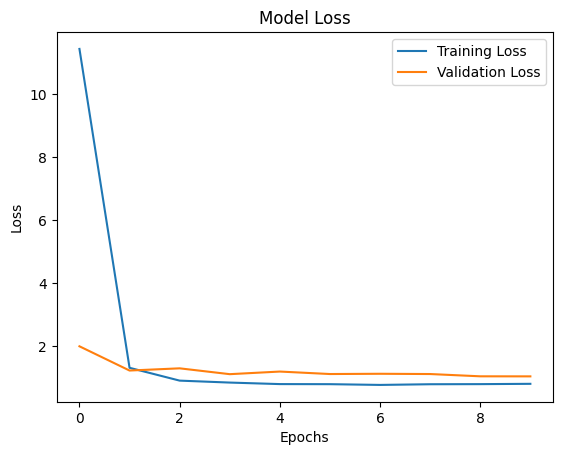

337/337 [==============================] - 1s 4ms/step - loss: 1.0034 - accuracy: 0.6438
Test Loss: 1.0033950805664062, Test Accuracy: 0.6437604427337646
337/337 [==============================] - 1s 3ms/step


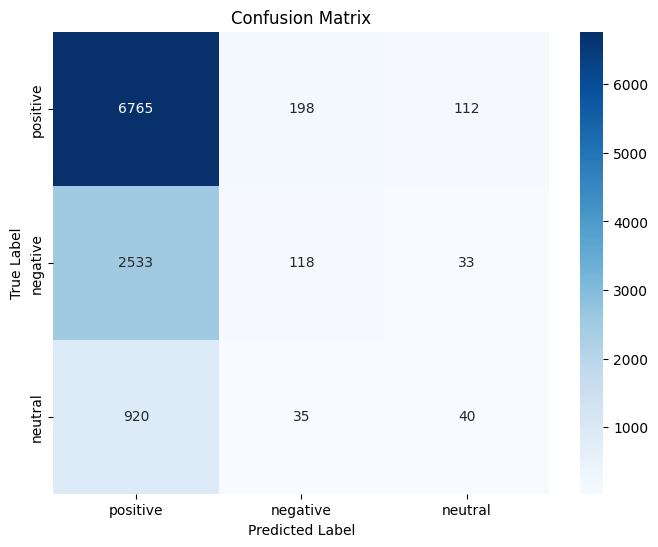

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


# Plot loss graph
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()